# 価値反復

千葉工業大学 上田 隆一

(c) 2017 Ryuichi Ueda

This software is released under the MIT License, see LICENSE.

## はじめに

このコードは、価値反復の実装の例です。


## 問題

次のような簡単な問題を扱います。

3x3の碁盤の世界を準備します。ロボットはマス目のどこかに存在し、1歩で上下左右に1マス移動できます。右上をゴールにして、あるマス目をスタート地点とするとき、何歩でゴールに達するかを、全マス目に対して計算しましょう。ただし、この世界は壁に囲まれていて、壁を超えて移動しようとすると元のマスに戻されます。


## 準備

次のような変数を準備します。

* costs: 各マスをスタートにしたときのゴールまでの歩数を記録する2次元のリスト
* goal: ゴールの座標。ゴールは2つ以上でも酔いが、この問題では1個だけ
* actions: ロボットが選択できる行動のリスト

valuesの初期値はデタラメで大丈夫ですが、ゴールに相当するマス目のものだけ正解の0にセットしておきます。


In [1]:
%matplotlib inline
import numpy as np

size = 3                                                       # 1辺が3マス
costs = [[1,2,3],[4,5,6],[7,8,0]]           # 3x3のマス目の世界を作る。座標はこのリストの添え字で表す
goal = (2,2)                                               # ゴールを1個だけ座標(2,2)に置く
actions = ["up","down","left","right"]  # ロボットが選択できる行動のリスト

# 指定した座標のコストを返す補助の関数
def cost(pos): 
    p = [pos[0],pos[1]]
    
    for i in [0,1]:  # 壁にぶつかったらそのまま
        if p[i] < 0:        p[i] = 0
        if p[i] >= size: p[i] = size - 1
            
    return costs[p[0]][p[1]]

## 描画

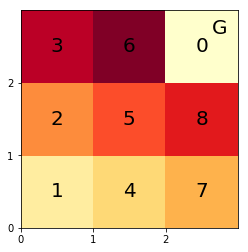

In [2]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos, action):  # mark_pos はマス目に目印の枠をつけるときに使います
    fig, ax = plt.subplots()
    mp = ax.pcolor(costs, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(costs)):
        for y in range(len(costs[0])):
            plt.text(x+0.5,y+0.5,costs[x][y],ha = 'center', va = 'center', size=20)
            
    plt.text(goal[0]+0.75,goal[1]+0.75,"G",ha = 'center', va = 'center', size=20)
    
    if mark_pos != None:
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None,None)

## 問題を価値反復で解く


### 行動価値の計算式

歩行の即時コスト1＋遷移先のコストを返します。

In [ ]:
def action_value(pos, action, goal):
    if pos == goal: return cost(pos)    # ゴールの価値は不変
    
    if    action == "up":      return 1+cost((pos[0],pos[1]+1))
    elif action == "down": return 1+cost((pos[0],pos[1]-1))
    elif action == "left":    return 1+cost((pos[0]-1,pos[1]))
    elif action == "right":  return 1+cost((pos[0]+1,pos[1]))

### スイープ

各マス目について、各行動の行動価値を求めて最もコストが低いものを選び、そのときのコストでcostsリストを更新していきます。

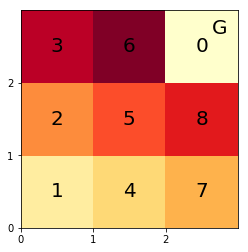

sweep 1


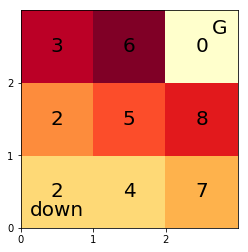

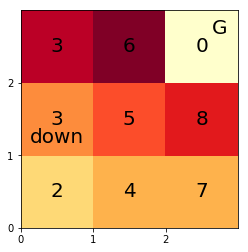

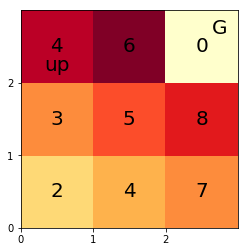

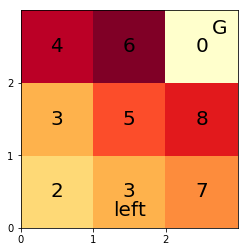

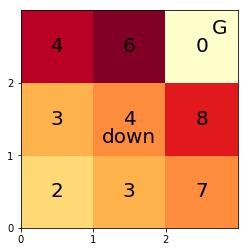

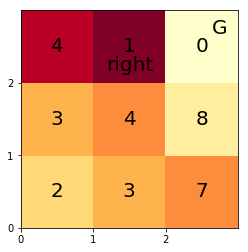

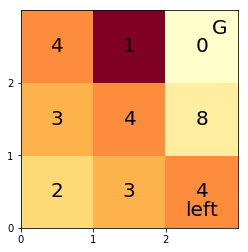

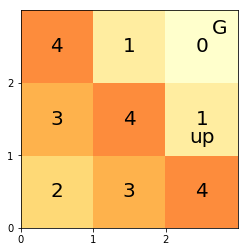

sweep 2


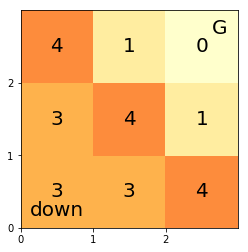

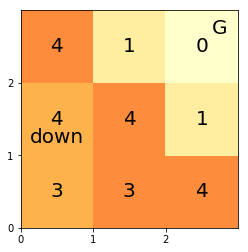

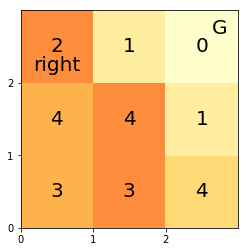

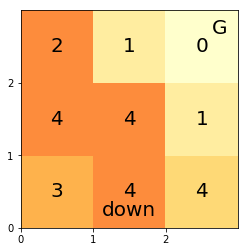

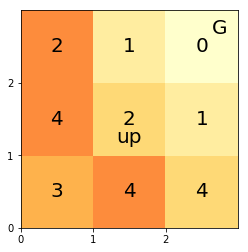

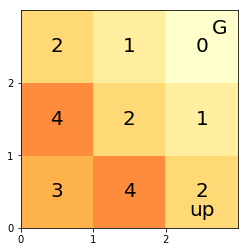

sweep 3


In [ ]:
def sweep():
    changed = False
    
    for x in range(size):
        for y in range(size):
            min_cost = 100
            min_action = None
            for a in actions:
                c = action_value((x,y), a, goal)
                if c < min_cost:
                    min_cost = c
                    min_action = a

            if costs[x][y] != min_cost:
                costs[x][y] = min_cost
                draw((x,y),min_action)
                changed = True

    return changed

draw(None,None)
changed = True
n = 1
while changed:
    print("sweep",n)
    changed = sweep()
    n = n + 1
    
draw(None,None)